# Problem 4

In [156]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [157]:
# LIBRARIES
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import*
import sympy as sp
import matplotlib.pyplot as plt
from sympy.matrices import Matrix
from sympy import pprint

# SYMBOLS FOR EXPRESSION
x = sp.Symbol('x')
x_1 = sp.Symbol('x_1')
x_2 = sp.Symbol('x_2')
x_3 = sp.Symbol('x_3')
x_4 = sp.Symbol('x_4')

c_1 = sp.Symbol('C_1')
c_2 = sp.Symbol('C_2')
c_3 = sp.Symbol('C_3')
c_4 = sp.Symbol('C_4')

a = sp.Symbol('a')
L = sp.Symbol('L')
E = sp.Symbol('E')
X = sp.Symbol('X')
h_0 = sp.Symbol('H_0')
p_0 = sp.Symbol('p_0')
u23 = sp.Symbol('u^3_2')
u24 = sp.Symbol('u^4_2')
keq = sp.Symbol('K_eq')

f_1= sp.Function('u^1_2')(x)
f_2= sp.Function('u^2_2')(x)
f_3= sp.Function('u^3_2')(x)
f_4= sp.Function('u^4_2')(x)


fM1 = sp.Function('M^1_3')(x)
fM2 = sp.Function('M^2_3')(x)
fM3 = sp.Function('M^3_3')(x)
fM4 = sp.Function('M^4_3')(x)

### Top bar  Moment and Transverse Displacement differential equations

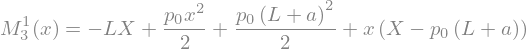

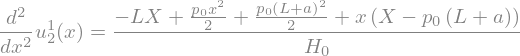

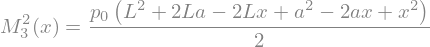

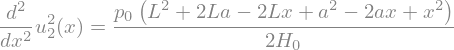

In [158]:
moment_equation_1 = Eq(fM1, (p_0*(x**2)/2 + (-p_0*(L+a)+X)*x + ((p_0*((L+a)**2)/2)-X*L)))
u2_1_equation = Eq(f_1.diff(x, 2), (1/h_0) * (p_0*(x**2)/2 + (-p_0*(L+a)+X)*x + ((p_0*((L+a)**2)/2)-X*L)))

moment_equation_2 = (Eq(fM2, -(x-L)*X + p_0*(x**2)/2 + (-p_0*(L+a)+X)*x + p_0*(((L+a)**2)/2)-X*L))
u2_2_equation = (Eq(f_2.diff(x, 2), (1/h_0) * (-(x-L)*X + p_0*(x**2)/2 + (-p_0*(L+a)+X)*x + p_0*(((L+a)**2)/2)-X*L)))

display(simplify(moment_equation_1), simplify(u2_1_equation), simplify(moment_equation_2), simplify(u2_2_equation))

### Boundary Conditions and General solution for the upper beam transverse displacement

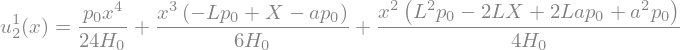

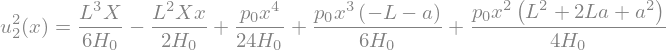

In [159]:
b_condition_1 = {f_1.diff(x, 1).subs(x, 0): 0,
                 f_1.subs(x, 0): 0}
solution_general_form_u2_1 = dsolve(u2_1_equation, ics=b_condition_1)

b_condition_2 = {f_2.diff(x, 1).subs(x, L):
                 solution_general_form_u2_1.rhs.diff(x, 1).subs(x, L),
                 f_2.subs(x, L): 
                 solution_general_form_u2_1.rhs.subs(x, L)}
solution_general_form_u2_2 = dsolve(u2_2_equation, ics=b_condition_2)

display(solution_general_form_u2_1, solution_general_form_u2_2)

### Bottom bar Moment and Transverse Displacement differential equations

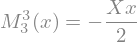

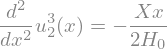

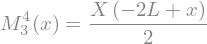

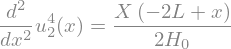

In [160]:
moment_equation_3 = Eq(fM3, (-X*x)/2)
u2_3_equation = Eq(f_3.diff(x, 2), (1/h_0) * (-X*x)/2)

moment_equation_4 = simplify(Eq(fM4, (X * (x - L))  - X*(x/2)))
u2_4_equation = simplify(Eq(f_4.diff(x, 2), (1/h_0) * ((X * (x - L)) - X*(x/2))))

display(moment_equation_3, u2_3_equation, moment_equation_4, u2_4_equation)

### Boundary conditions and General solutions for the bottom beam transverse displacement

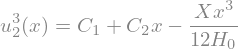

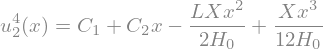

In [161]:
b_condition_3 = {f_3.subs(x, 0): 0}
solution_general_form_u2_3 = dsolve(u2_3_equation)
display(solution_general_form_u2_3)

b_condition_4 = {f_4.subs(x, 2*L): 0}
solution_general_form_u2_4 = dsolve(u2_4_equation)
display(solution_general_form_u2_4)

### Integration Coefficient for the transverse displacement equation for bottom beam

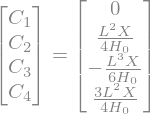

In [162]:
solution_general_form_u2_3 = dsolve(u2_3_equation)
solution_general_form_u2_4 = dsolve(u2_4_equation)

coefficient_matrix = Matrix([[1,0,0,0],
                            [0,1,0,-1],
                            [1,L,-1,-L],
                            [0,0,1,2*L]])
variable_matrix = Matrix([[c_1],[c_2],[c_3],[c_4]])
solution_matrix = Matrix([[0],[(-L**2*X)/(2*h_0)],[(-X*L**3)/(3*h_0)],[(4*X*L**3)/(3*h_0)]])
display(Eq(variable_matrix, coefficient_matrix.inv()*solution_matrix))
coefficient_matrix_val = coefficient_matrix.inv()*solution_matrix

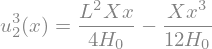

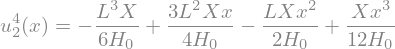

In [163]:
solution_general_form_u2_3 = (c_1 + c_2*x - (X*x**3)/(12*h_0))
solution_general_form_u2_3 = solution_general_form_u2_3.subs({c_1: coefficient_matrix_val[0],
                                                             c_2: coefficient_matrix_val[1]})

solution_general_form_u2_4 = (c_3 + c_4*x - (L*X*x**2)/(2*h_0) + (X*x**3)/(12*h_0))
solution_general_form_u2_4 = solution_general_form_u2_4.subs({c_3: coefficient_matrix_val[2],
                                                             c_4: coefficient_matrix_val[3]})

display(Eq (f_3, solution_general_form_u2_3))
display(Eq (f_4, solution_general_form_u2_4))

### Value of force X and the spring stiffness Keq

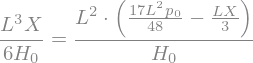

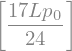

In [164]:
force_equation = Eq(simplify(solution_general_form_u2_3.subs(x, L)), 
                    simplify(solution_general_form_u2_1.rhs.subs(x, L))
                   )
display(force_equation.subs(a, L/2))
solve(force_equation.subs(a, L/2), X)

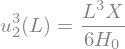

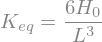

In [165]:
total_displacement_at_beam_intersection = solution_general_form_u2_3.subs({x: L})
display(Eq(f_3.subs(x, L), total_displacement_at_beam_intersection), Eq(keq, (6*h_0)/L**3))

### From the above expression its clear that the spring with Keq stiffness can be used at the place of the bottom beam. 

### General Solution equations of the system after using the value of force, X and upper beam segment length, a

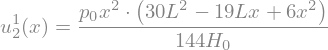

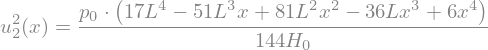

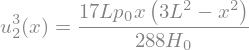

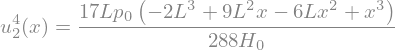

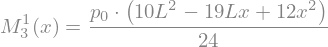

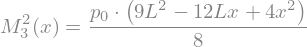

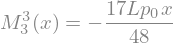

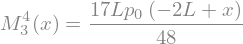

In [166]:
solution_general_form_u2_1 = solution_general_form_u2_1.subs({X: 17*L*p_0/24,
                                                              a: L/2})
solution_general_form_u2_2 = solution_general_form_u2_2.subs({X: 17*L*p_0/24,
                                                              a: L/2})
solution_general_form_u2_3 = solution_general_form_u2_3.subs({X: 17*L*p_0/24,
                                                              a: L/2})
solution_general_form_u2_4 = solution_general_form_u2_4.subs({X: 17*L*p_0/24,
                                                              a: L/2})

moment_equation_1 = moment_equation_1.subs({X: 17*L*p_0/24,
                                            a: L/2})
moment_equation_2 = moment_equation_2.subs({X: 17*L*p_0/24,
                                            a: L/2})
moment_equation_3 = moment_equation_3.subs({X: 17*L*p_0/24,
                                            a: L/2})
moment_equation_4 = moment_equation_4.subs({X: 17*L*p_0/24,
                                            a: L/2})

display(simplify(solution_general_form_u2_1),
       simplify(solution_general_form_u2_2),
        simplify(Eq(f_3, solution_general_form_u2_3)),
        simplify(Eq(f_4, solution_general_form_u2_4)),
       simplify(moment_equation_1),
       simplify(moment_equation_2),
        simplify(moment_equation_3),
        simplify(moment_equation_4)
       )

## Elastic curve - Upper beam

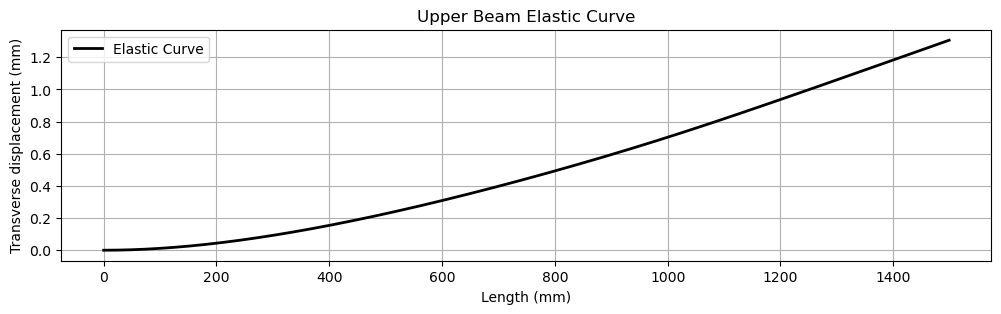

In [167]:
upper_beam_equation_1 = solution_general_form_u2_1.rhs.subs({p_0:5,
                                                              h_0:84*10**10,
                                                              L:1000})
upper_beam_equation_2 = solution_general_form_u2_2.rhs.subs({p_0:5,
                                                              h_0:84*10**10,
                                                              L:1000})
segment_L = 1000
segment_a = segment_L/2
length_of_upper_beam = segment_L + segment_a

x_axis_val = []
y_axis_val = []
plt.figure(figsize=(12, 3))

for i in range(0, int(length_of_upper_beam), 1):
    x_axis_val.append(i)
    if i <= segment_L:
        y_val = upper_beam_equation_1.subs({x: i})
        y_axis_val.append(y_val)
    else:
        y_val = upper_beam_equation_2.subs({x: i})
        y_axis_val.append(y_val)
plt.plot(x_axis_val, y_axis_val, linewidth='2', color='black')
plt.xlabel('Length (mm)')
plt.ylabel('Transverse displacement (mm)')
plt.title('Upper Beam Elastic Curve')
plt.legend(['Elastic Curve'])
plt.grid()

## Bending moment - Upper beam

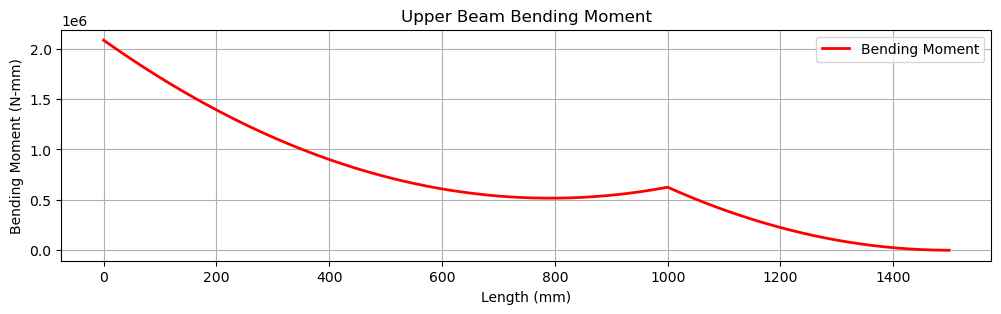

In [168]:
upper_beam_equation_1 = moment_equation_1.rhs.subs({p_0:5, L:1000})
upper_beam_equation_2 = moment_equation_2.rhs.subs({p_0:5, L:1000})

segment_L = 1000
segment_a = segment_L/2
length_of_upper_beam = segment_L + segment_a

x_axis_val = []
y_axis_val = []
plt.figure(figsize=(12, 3))

for i in range(0, int(length_of_upper_beam), 1):
    x_axis_val.append(i)
    if i <= segment_L:
        y_val = upper_beam_equation_1.subs({x: i})
        y_axis_val.append(y_val)
    else:
        y_val = upper_beam_equation_2.subs({x: i})
        y_axis_val.append(y_val)
plt.plot(x_axis_val, y_axis_val, linewidth='2', color='red')
plt.xlabel('Length (mm)')
plt.ylabel('Bending Moment (N-mm)')
plt.title('Upper Beam Bending Moment')
plt.legend(['Bending Moment'])
plt.grid()

## Shear force - Upper beam

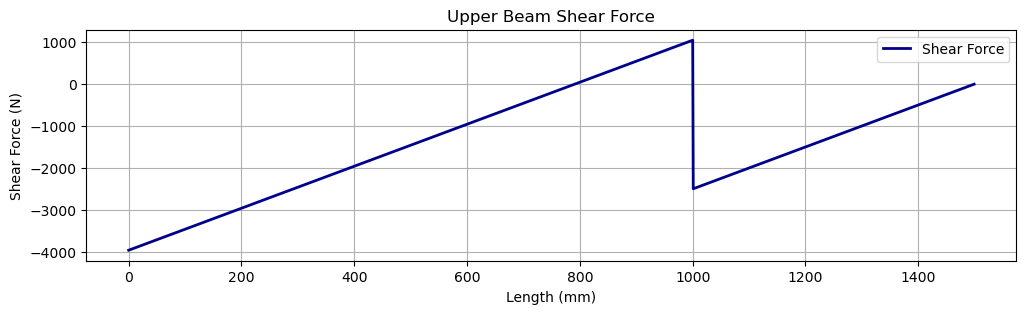

In [169]:
upper_beam_equation_1 = moment_equation_1.rhs.diff(x,1).subs({p_0:5, L:1000})
upper_beam_equation_2 = moment_equation_2.rhs.diff(x,1).subs({p_0:5, L:1000})

segment_L = 1000
segment_a = segment_L/2
length_of_upper_beam = segment_L + segment_a

x_axis_val = []
y_axis_val = []
plt.figure(figsize=(12, 3))

for i in range(0, int(length_of_upper_beam), 1):
    x_axis_val.append(i)
    if i <= segment_L:
        y_val = upper_beam_equation_1.subs({x: i})
        y_axis_val.append(y_val)
    else:
        y_val = upper_beam_equation_2.subs({x: i})
        y_axis_val.append(y_val)
plt.plot(x_axis_val, y_axis_val, linewidth='2', color='darkblue')
plt.xlabel('Length (mm)')
plt.ylabel('Shear Force (N)')
plt.title('Upper Beam Shear Force')
plt.legend(['Shear Force'])
plt.grid()

## Elastic curve - Bottom beam

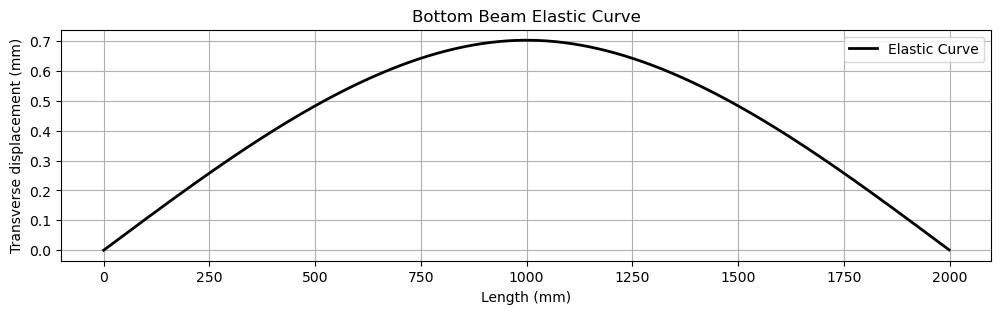

In [170]:
bottom_beam_equation_1 = solution_general_form_u2_3.subs({p_0:5,
                                                              h_0:84*10**10,
                                                              L:1000})
bottom_beam_equation_2 = solution_general_form_u2_4.subs({p_0:5,
                                                              h_0:84*10**10,
                                                              L:1000})
length_of_bottom_beam = 2*1000

x_axis_val = []
y_axis_val = []
plt.figure(figsize=(12, 3))

for i in range(0, int(length_of_bottom_beam), 1):
    x_axis_val.append(i)
    if i <= 1000:
        y_val = bottom_beam_equation_1.subs({x: i})
        y_axis_val.append(y_val)
    else:
        y_val = bottom_beam_equation_2.subs({x: i})
        y_axis_val.append(y_val)
plt.plot(x_axis_val, y_axis_val, linewidth='2', color='black')
plt.xlabel('Length (mm)')
plt.ylabel('Transverse displacement (mm)')
plt.title('Bottom Beam Elastic Curve')
plt.legend(['Elastic Curve'])
plt.grid()

## Bending moment - Bottom beam

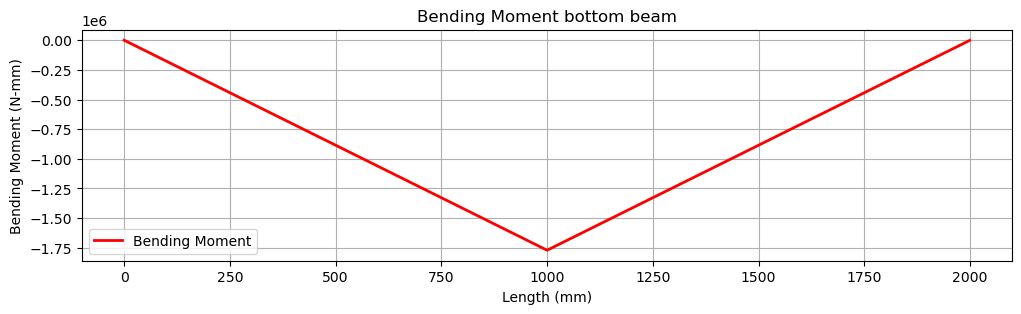

In [171]:
bottom_beam_equation_1 = moment_equation_3.rhs.subs({p_0:5,
                                                              h_0:84*10**10,
                                                              L:1000})
bottom_beam_equation_2 = moment_equation_4.rhs.subs({p_0:5,
                                                              h_0:84*10**10,
                                                              L:1000})
length_of_bottom_beam = 2*1000

x_axis_val = []
y_axis_val = []
plt.figure(figsize=(12, 3))

for i in range(0, int(length_of_bottom_beam), 1):
    x_axis_val.append(i)
    if i <= 1000:
        y_val = bottom_beam_equation_1.subs({x: i})
        y_axis_val.append(y_val)
    else:
        y_val = bottom_beam_equation_2.subs({x: i})
        y_axis_val.append(y_val)
plt.plot(x_axis_val, y_axis_val, linewidth='2', color='red')
plt.xlabel('Length (mm)')
plt.ylabel('Bending Moment (N-mm)')
plt.title('Bending Moment bottom beam')
plt.legend(['Bending Moment'])
plt.grid()

## Shear force - Bottom beam

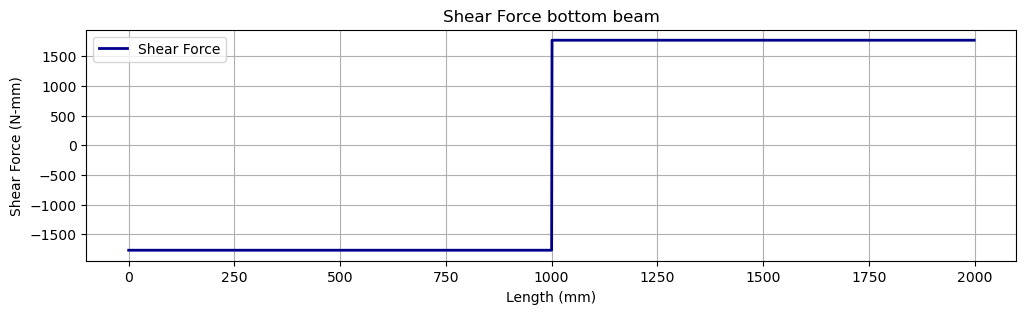

In [172]:
bottom_beam_equation_1 = moment_equation_3.rhs.diff(x,1).subs({p_0:5,
                                                              h_0:84*10**10,
                                                              L:1000})
bottom_beam_equation_2 = moment_equation_4.rhs.diff(x,1).subs({p_0:5,
                                                              h_0:84*10**10,
                                                              L:1000})
length_of_bottom_beam = 2*1000

x_axis_val = []
y_axis_val = []
plt.figure(figsize=(12, 3))

for i in range(0, int(length_of_bottom_beam), 1):
    x_axis_val.append(i)
    if i <= 1000:
        y_val = bottom_beam_equation_1.subs({x: i})
        y_axis_val.append(y_val)
    else:
        y_val = bottom_beam_equation_2.subs({x: i})
        y_axis_val.append(y_val)
plt.plot(x_axis_val, y_axis_val, linewidth='2', color='darkblue')
plt.xlabel('Length (mm)')
plt.ylabel('Shear Force (N-mm)')
plt.title('Shear Force bottom beam')
plt.legend(['Shear Force'])
plt.grid()

# Problem 5

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
# LIBRARIES
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import*
import sympy as sp
import matplotlib.pyplot as plt
from sympy.matrices import Matrix
from sympy import pprint
import numpy as np
import fractions

# SYMBOLS FOR EXPRESSION
x = sp.Symbol('x')
L = sp.Symbol('L')
X = sp.Symbol('X')
h_33c = sp.Symbol('H^c_33')
p = sp.Symbol('P')
keq = sp.Symbol('K_eq')
alpha = sp.Symbol('alpha')

f_1= sp.Function('u^1_2')(x)
f_2= sp.Function('u^2_2')(x)
f_3= sp.Function('u^3_2')(x)

fM1 = sp.Function('M^1_3')(x)
fM2 = sp.Function('M^2_3')(x)
fM3 = sp.Function('M^3_3')(x)

### Bending Moment and Displacement field differential equations bottom beam

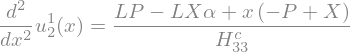

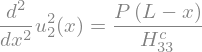

In [4]:
moment_equation_1 = Eq(fM1, (X-p)*x - alpha*L*X + p*L)
u2_1_equation = Eq(f_1.diff(x, 2), (1/h_33c)*((X-p)*x - alpha*L*X + p*L))

moment_equation_2 = Eq(fM2, (-X*(x-alpha*L) + (X-p)*x - alpha*L*X + p*L))
u2_2_equation = simplify(Eq(f_2.diff(x, 2), (1/h_33c)*(-X*(x-alpha*L) + (X-p)*x - alpha*L*X + p*L)))

display(simplify(moment_equation_1), u2_1_equation, simplify(moment_equation_2), simplify(u2_2_equation))

### Boundary conditions for the bottom beam transverse displacement differential equations

In [5]:
b_condition_1 = {f_1.diff(x, 1).subs(x, 0): 0,
                 f_1.subs(x, 0): 0}
solution_general_form_u2_1 = dsolve(u2_1_equation, ics=b_condition_1)

b_condition_2 = {f_2.diff(x, 1).subs(x, alpha*L):
                 solution_general_form_u2_1.rhs.diff(x, 1).subs(x, alpha*L),
                 f_2.subs(x, alpha*L): 
                 solution_general_form_u2_1.rhs.subs(x, alpha*L)}
solution_general_form_u2_2 = dsolve(u2_2_equation, ics=b_condition_2)

### Bending moment equation and transverse displacement differential equation for the upper beam

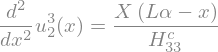

In [6]:
moment_equation_3 = Eq(fM3, (alpha*L-x)*X)
u2_3_equation = Eq(f_3.diff(x, 2), (1/h_33c) * (alpha*L-x)*X) 
display(moment_equation_3, u2_3_equation)

### Boundary conditions for the upper beam

In [7]:
b_condition_3 = {f_3.diff(x, 1).subs(x, 0): 0,
                 f_3.subs(x, 0): 0}
solution_general_form_u2_3 = dsolve(u2_3_equation, ics=b_condition_3)

### Value of the force X at the point of contact between upper and the bottom beam

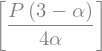

In [8]:
solve(Eq(solution_general_form_u2_1.rhs.subs(x, alpha*L),
   solution_general_form_u2_3.rhs.subs(x, alpha*L)), X)

### General Solution equations of the system after using the value of contact force, X.

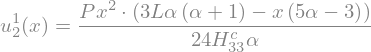

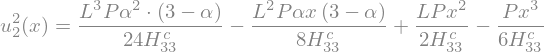

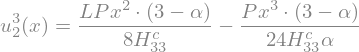

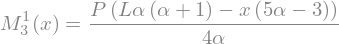

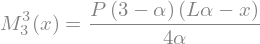

In [9]:
solution_general_form_u2_1 = solution_general_form_u2_1.subs(X, p*(3-alpha)/(4*alpha))
solution_general_form_u2_2 = solution_general_form_u2_2.subs(X, p*(3-alpha)/(4*alpha))
solution_general_form_u2_3 = solution_general_form_u2_3.subs(X, p*(3-alpha)/(4*alpha))
moment_equation_1 = moment_equation_1.subs(X, p*(3-alpha)/(4*alpha))
moment_equation_3 = moment_equation_3.subs(X, p*(3-alpha)/(4*alpha))

display(simplify(solution_general_form_u2_1.subs(X, p*(3-alpha)/(4*alpha))), 
        solution_general_form_u2_2.subs(X, p*(3-alpha)/(4*alpha)),
        solution_general_form_u2_3.subs(X, p*(3-alpha)/(4*alpha)),
        simplify(moment_equation_1),
        simplify(moment_equation_2),
        moment_equation_3)

## Elastic curve - bottom beam as a function of alpha.

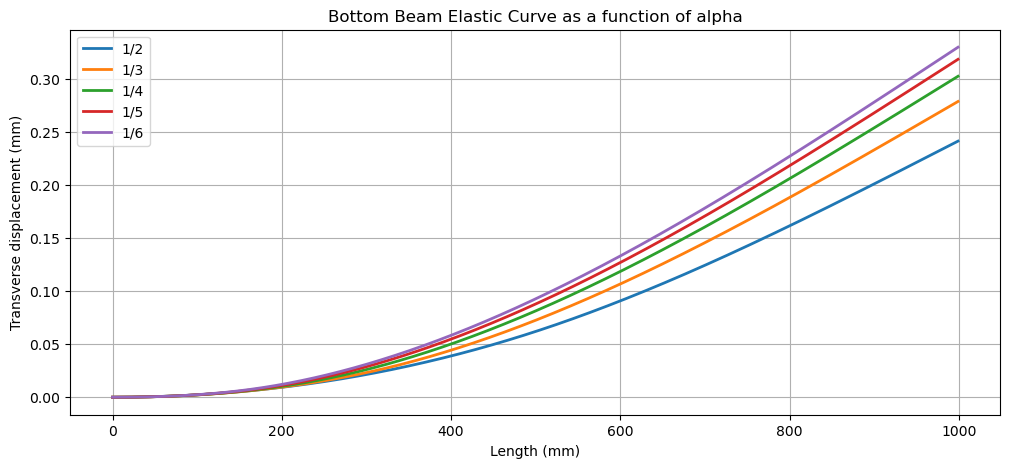

In [10]:
bottom_beam_equation_1 = solution_general_form_u2_1.rhs.subs({p:10**3,
                                                              h_33c:84*10**10,
                                                              L:1000})
bottom_beam_equation_2 = solution_general_form_u2_2.rhs.subs({p:10**3,
                                                              h_33c:84*10**10,
                                                              L:1000})


length_of_bottom_beam = 1000
x_axis_val = []
y_axis_val = []
plt.figure(figsize=(12, 5))
for j in range(2,7,1):
    alpha_val = 1/(j)
    labels = [fractions.Fraction(1,j)]
    for i in range(0, length_of_bottom_beam, 1):
        x_axis_val.append(i)
        if i <= (alpha_val*length_of_bottom_beam):
            y_val = bottom_beam_equation_1.subs({x: i, alpha: alpha_val})
            y_axis_val.append(y_val)
        else:
            y_val = bottom_beam_equation_2.subs({x: i, alpha: alpha_val})
            y_axis_val.append(y_val)
    plt.plot(x_axis_val, y_axis_val, linewidth='2', label=labels[0])
    x_axis_val = []
    y_axis_val = []
plt.xlabel('Length (mm)')
plt.ylabel('Transverse displacement (mm)')
plt.title('Bottom Beam Elastic Curve as a function of alpha')
plt.legend()
plt.grid()

## Bending moment - bottom beam as a function of alpha

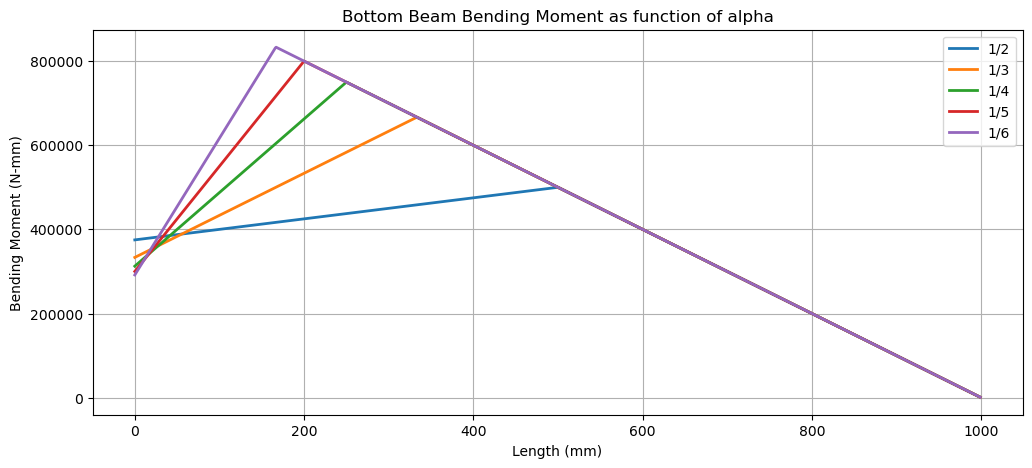

In [11]:
bottom_beam_equation_1 = moment_equation_1.rhs.subs({p:10**3,
                                                    L:1000})
bottom_beam_equation_2 = moment_equation_2.rhs.subs({p:10**3,
                                                     L:1000})

length_of_bottom_beam = 1000
x_axis_val = []
y_axis_val = []
plt.figure(figsize=(12, 5))
for j in range(2,7,1):
    alpha_val = 1/j
    labels = [fractions.Fraction(1,j)]
    for i in range(0, length_of_bottom_beam, 1):
        x_axis_val.append(i)
        if i <= (alpha_val*length_of_bottom_beam):
            y_val = bottom_beam_equation_1.subs({x: i, alpha: alpha_val})
            y_axis_val.append(y_val)
        else:
            y_val = bottom_beam_equation_2.subs({x: i, alpha: alpha_val})
            y_axis_val.append(y_val)
    plt.plot(x_axis_val, y_axis_val, linewidth='2', label=labels[0])
    x_axis_val = []
    y_axis_val = []
plt.xlabel('Length (mm)')
plt.ylabel('Bending Moment (N-mm)')
plt.title('Bottom Beam Bending Moment as function of alpha')
plt.legend()
plt.grid()

### So, for the maximum value of bending moment is achieved when alpha is 1/2 and the location of the point is L*alpha from the x = 0

## Shear force - bottom beam as a function of alpha

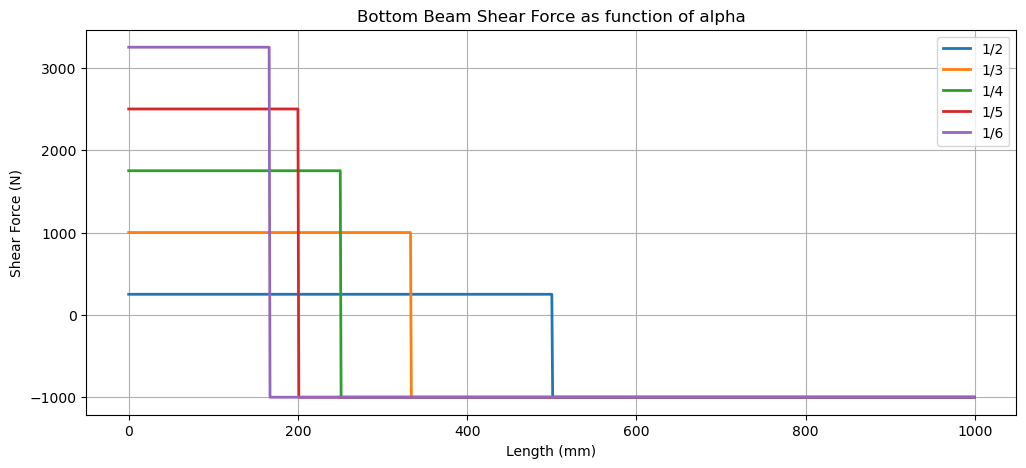

In [12]:
bottom_beam_equation_1 = moment_equation_1.rhs.diff(x, 1).subs({p:10**3})
bottom_beam_equation_2 = moment_equation_2.rhs.diff(x, 1).subs({p:10**3,
                                                                L:1000})

length_of_bottom_beam = 1000
x_axis_val = []
y_axis_val = []
plt.figure(figsize=(12, 5))
for j in range(2,7,1):
    alpha_val = 1/j
    labels = [fractions.Fraction(1,j)]
    for i in range(0, length_of_bottom_beam, 1):
        x_axis_val.append(i)
        if i <= (alpha_val*length_of_bottom_beam):
            y_val = bottom_beam_equation_1.subs({x: i, alpha: alpha_val})
            y_axis_val.append(y_val)
        else:
            y_val = bottom_beam_equation_2.subs({x: i, alpha: alpha_val})
            y_axis_val.append(y_val)
    plt.plot(x_axis_val, y_axis_val, linewidth='2', label=labels[0])
    x_axis_val = []
    y_axis_val = []
plt.xlabel('Length (mm)')
plt.ylabel('Shear Force (N)')
plt.title('Bottom Beam Shear Force as function of alpha')
plt.legend()
plt.grid()

## Elastic curve - upper beam as a function of alpha

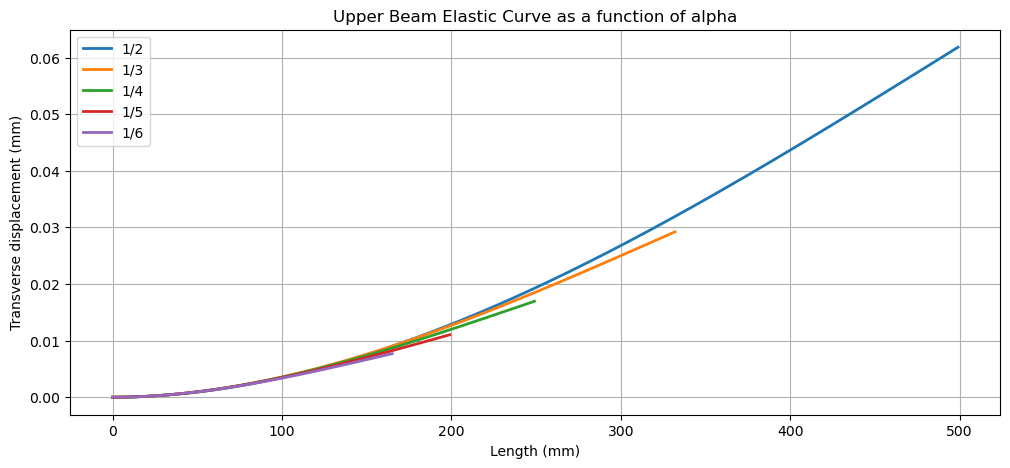

In [13]:
upper_beam_equation = solution_general_form_u2_3.rhs.subs({p:10**3,
                                                           h_33c:84*10**10,
                                                           L:1000})
length_of_bottom_beam = 1000
x_axis_val = []
y_axis_val = []
plt.figure(figsize=(12, 5))
for j in range(2,7,1):
    alpha_val = 1/j
    labels = [fractions.Fraction(1,j)]
    for i in range(0, int(length_of_bottom_beam/j), 1):
        x_axis_val.append(i)
        y_val = upper_beam_equation.subs({x: i, alpha: alpha_val})
        y_axis_val.append(y_val)
    plt.plot(x_axis_val, y_axis_val, linewidth='2', label=labels[0])
    x_axis_val = []
    y_axis_val = []
plt.xlabel('Length (mm)')
plt.ylabel('Transverse displacement (mm)')
plt.title('Upper Beam Elastic Curve as a function of alpha')
plt.legend()
plt.grid()

## Bending moment - upper beam as a function of alpha

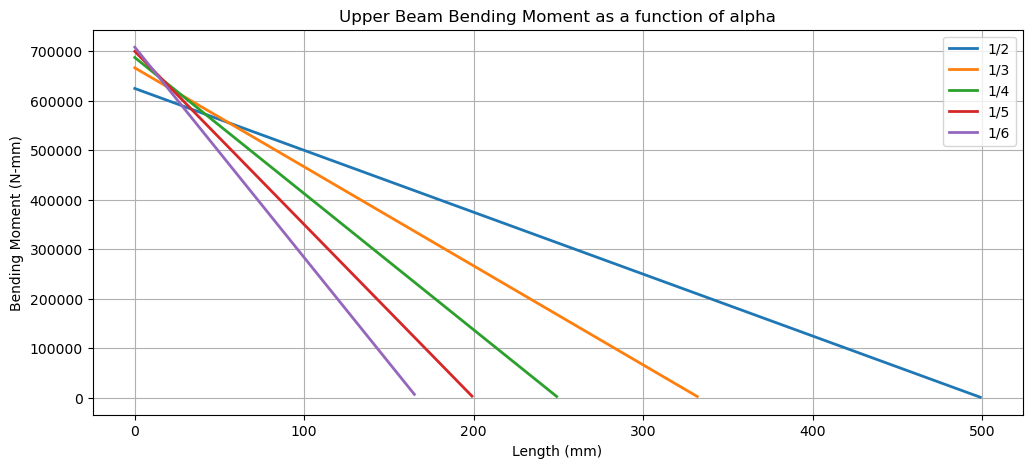

In [14]:
upper_beam_equation = moment_equation_3.rhs.subs({p:10**3,
                                                  L:1000})
length_of_bottom_beam = 1000
x_axis_val = []
y_axis_val = []
plt.figure(figsize=(12, 5))
for j in range(2,7,1):
    alpha_val = 1/j
    labels = [fractions.Fraction(1,j)]
    for i in range(0, int(length_of_bottom_beam/j), 1):
        x_axis_val.append(i)
        y_val = upper_beam_equation.subs({x: i, alpha: alpha_val})
        y_axis_val.append(y_val)
    plt.plot(x_axis_val, y_axis_val, linewidth='2', label=labels[0])
    x_axis_val = []
    y_axis_val = []
plt.xlabel('Length (mm)')
plt.ylabel('Bending Moment (N-mm)')
plt.title('Upper Beam Bending Moment as a function of alpha')
plt.legend()
plt.grid()

## Shear force - upper beam as a function of alpha

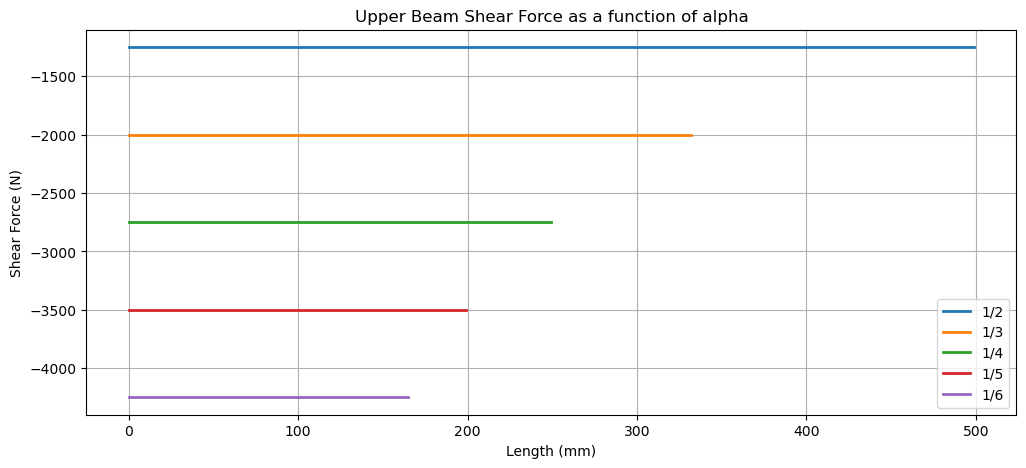

In [15]:
upper_beam_equation = moment_equation_3.rhs.diff(x, 1).subs({p:10**3})
length_of_bottom_beam = 1000
x_axis_val = []
y_axis_val = []
plt.figure(figsize=(12, 5))
for j in range(2,7,1):
    alpha_val = 1/j
    labels = [fractions.Fraction(1,j)]
    for i in range(0, int(length_of_bottom_beam/j), 1):
        x_axis_val.append(i)
        y_val = upper_beam_equation.subs({x: i, alpha: alpha_val})
        y_axis_val.append(y_val)
    plt.plot(x_axis_val, y_axis_val, linewidth='2', label=labels[0])
    x_axis_val = []
    y_axis_val = []
plt.xlabel('Length (mm)')
plt.ylabel('Shear Force (N)')
plt.title('Upper Beam Shear Force as a function of alpha')
plt.legend()
plt.grid()